## Library Imports

In [8]:
import math
from nltk.corpus import wordnet
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


import itertools

from sklearn.utils import shuffle



## **Import Dataset**

In [9]:
train = shuffle(pd.read_csv("training.csv"))
test = pd.read_csv("testing.csv")

## Seprate Train X and Train Y from training data

In [10]:
trainX = np.array(train['text'])
trainY = np.array(train['label'])
print(train.shape)
train.head()

(1300, 3)


,index,text,label
283,283,اب ہو گا خشکی کا یقینی خاتمہ بغیر مضر اثرات کے...,1
4,4,\nگاڑی کی ٹکر سے ایک شخص کی ہلاکت پر بھارتی کر...,1
733,733,پرینکا چوپڑا اور نک جونس نے انڈیا میں مسیحی عق...,0
238,238,پاکستان کی خبر جنگ نے دعویٰ کیا ہے کہ پاکستان ...,1
1018,1018,پاکستان کے دارالحکومت اسلام آباد میں سبزی منڈ...,0


## Seprate Test X and Test Y from test data

In [11]:
testX = np.array(test['text'])
#testY = np.array(train['label'])

## Generate unigram Feature Matrix

In [12]:
vectTrain = CountVectorizer(input='content',decode_error='ignore',analyzer='word', strip_accents='unicode', binary=False, ngram_range=(1,2)).fit(trainX)
X_train_vectorized = vectTrain.transform(trainX).toarray()
X_test_vectorized = vectTrain.transform(testX).toarray()

## Plot Confussion matrix

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Ada Boost

In [15]:
adaBoostClassifier = AdaBoostClassifier(n_estimators=2000, random_state=0)
adaBoostClassifier.fit(X_train_vectorized, trainY)
trainPredictionAda = adaBoostClassifier.predict(X_train_vectorized)
testPredictionsAda = adaBoostClassifier.predict(X_test_vectorized)

## Confusion Matrix For Test Data

In [16]:
# cm = confusion_matrix(testPredictionsAda, testY) 
# print(cm)
# plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## Confusion Matrox for Train Data

[[749   0]
 [  1 550]]
Confusion matrix, without normalization


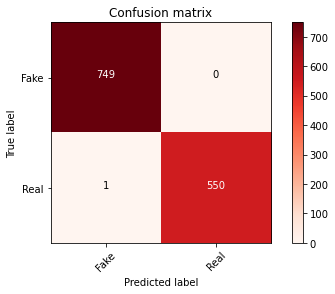

In [17]:
cm = confusion_matrix(trainPredictionAda, trainY) 
print(cm)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## Training Accuracy

In [18]:
print ("Precision_Recall_Fscore on Training Data is:",precision_recall_fscore_support(trainY, trainPredictionAda, average='weighted'))
print ("Overall Accuracy on Training Data is:",metrics.accuracy_score(trainY,trainPredictionAda))

Precision_Recall_Fscore on Training Data is: (0.9992321652938713, 0.9992307692307693, 0.999230861982233, None)
Overall Accuracy on Training Data is: 0.9992307692307693


## Testing Accuracy

In [19]:
# print ("Precision_Recall_Fscore on Testing Data is:",precision_recall_fscore_support(testY,testPredictionsAda, average='weighted'))
# print ("Overall Accuracy on Testing Data is:",metrics.accuracy_score(testY,testPredictionsAda))

## GBM

In [20]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train_vectorized, trainY)

trainPredictiongbm = clf.predict(X_train_vectorized)
testPredictionsgbm = clf.predict(X_test_vectorized)

## Training Confusion Matrix

[[750   1]
 [  0 549]]
Confusion matrix, without normalization


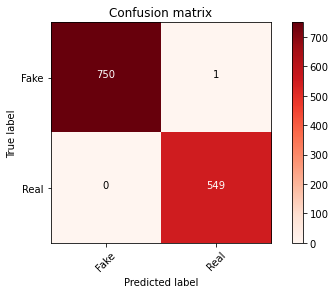

In [21]:
cm = confusion_matrix(trainPredictiongbm, trainY) 
print(cm)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## Testing Confusion Matrix

In [22]:
# cm = confusion_matrix(testPredictionsgbm, testY) 
# print(cm)
# plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## Training Accuracy

In [23]:
print ("Precision_Recall_Fscore on Training Data is:",precision_recall_fscore_support(trainY, trainPredictiongbm, average='weighted'))
print ("Overall Accuracy on Training Data is:",metrics.accuracy_score(trainY,trainPredictiongbm))

Precision_Recall_Fscore on Training Data is: (0.9992317935060944, 0.9992307692307693, 0.9992306755016966, None)
Overall Accuracy on Training Data is: 0.9992307692307693


## Testing Accuracy

In [24]:
# print ("Precision_Recall_Fscore on Testing Data is:",precision_recall_fscore_support(testY,testPredictionsgbm, average='weighted'))
# print ("Overall Accuracy on Testing Data is:",metrics.accuracy_score(testY,testPredictionsgbm))

## XG Boost

In [25]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()
model = xgb_clf.fit(X_train_vectorized, trainY)
trainPredictionxgb = xgb_clf.predict(X_train_vectorized)
testPredictionsxgb = xgb_clf.predict(X_test_vectorized)

/home/hammad/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:48:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## Training Confusion Matrix

[[750   2]
 [  0 548]]
Confusion matrix, without normalization


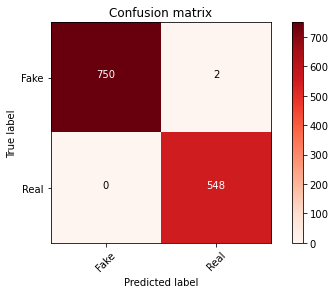

In [26]:
cm = confusion_matrix(trainPredictionxgb, trainY) 
print(cm)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## Testing Confusion Matrix

In [27]:
# cm = confusion_matrix(testPredictionsxgb, testY) 
# print(cm)
# plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## Training Accuracy

In [28]:
print ("Precision_Recall_Fscore on Training Data is:",precision_recall_fscore_support(trainY, trainPredictionxgb, average='weighted'))
print ("Overall Accuracy on Training Data is:",metrics.accuracy_score(trainY,trainPredictionxgb))

Precision_Recall_Fscore on Training Data is: (0.9984656301145663, 0.9984615384615385, 0.9984611615879215, None)
Overall Accuracy on Training Data is: 0.9984615384615385


## Testing Accuracy

In [29]:
# print ("Precision_Recall_Fscore on Testing Data is:",precision_recall_fscore_support(testY,testPredictionsxgb, average='weighted'))
# print ("Overall Accuracy on Testing Data is:",metrics.accuracy_score(testY,testPredictionsxgb))

## combine all the predictions

In [30]:
test['ADA_Result'] = testPredictionsAda
test['GBM_Result'] = testPredictionsgbm
test['XG_Result'] = testPredictionsxgb

In [31]:
df2 = test.copy()

## Compute Final Results

In [32]:
def computeResults(dfd):
    dfd["sum_of_results"] = 0
    for i, x in dfd.iterrows():
      dfd.loc[i,['sum_of_results']] = dfd["ADA_Result"][i] + dfd["GBM_Result"][i] + dfd["XG_Result"][i]
    for dex, row in dfd.iterrows():
      if dfd['sum_of_results'][dex] >= 2:
        dfd.loc[dex, ['label']] = 1
      else:
        dfd.loc[dex, ['label']] = 0
    return dfd

In [33]:
xData = computeResults(df2)

In [34]:
def computeFinalResults(df):
    df["Real/Fake"] = np.nan
    for index, row in df.iterrows():
      if df['label'][index] == 1 and df['XG_Result'][index] == 0  and df['sum_of_results'][index] >= 1:
        df.loc[index, ['Real/Fake']] = 'F'
      elif df['label'][index] == 0 and df['XG_Result'][index] == 1  and df['sum_of_results'][index] < 2:
        df.loc[index, ['Real/Fake']] = 'R'
      else:
        if df['XG_Result'][index] == 1:
          df.loc[index, ['Real/Fake']] = 'F'
        elif df['XG_Result'][index] == 0:
          df.loc[index, ['Real/Fake']] = 'R'
    return df

In [35]:
final_results = computeFinalResults(xData)

In [36]:
final_df = pd.DataFrame()
final_df = final_results[["File_No", "Real/Fake"]]
print(final_df)

     File_No Real/Fake
0         63         R
1        159         F
2        128         R
3         34         F
4         13         R
..       ...       ...
295      101         R
296      152         R
297      280         R
298      118         R
299      242         R

[300 rows x 2 columns]


## Save Prediction in file

In [38]:
final_df.to_csv('Technique_Two_Result.csv', index=False, encoding="utf-8") 